In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Fijar la semilla del generador
tf.keras.utils.set_random_seed(0)

In [3]:
df = pd.read_csv('./data/ford_train.tsv', sep='\t', header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-1,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,...,1.120756,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343
1,1,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,...,0.386403,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086
2,-1,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,...,0.394463,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391
3,-1,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,...,-0.952804,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736
4,-1,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,...,0.776188,0.725496,0.697453,0.731967,0.808545,0.839823,0.733046,0.437520,-0.026585,-0.602213


In [5]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [6]:
y = (y+1)/2 # Cambiar -1 por 0 (operación vectorizada en numpy)

## Dividir en train/val 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=0.8, random_state=0)

In [9]:
X_train.shape

(2880, 500)

In [10]:
X_val.shape

(721, 500)

## Crear modelo y entrenar

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               50100     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 56451 (220.51 KB)
Trainable params: 56451 (220.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(loss='mse', ) # mse = mean squared error (error cuadrado promedio)

In [14]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1)

Epoch 1/100

90/90 [==============================] - 2s 10ms/step - loss: 0.3529 - val_loss: 0.2693
Epoch 2/100
90/90 [==============================] - 1s 6ms/step - loss: 0.2625 - val_loss: 0.2673
Epoch 3/100
90/90 [==============================] - 1s 6ms/step - loss: 0.2568 - val_loss: 0.2650
Epoch 4/100
90/90 [==============================] - 1s 7ms/step - loss: 0.2568 - val_loss: 0.2550
Epoch 5/100
90/90 [==============================] - 0s 6ms/step - loss: 0.2551 - val_loss: 0.2617
Epoch 6/100
90/90 [==============================] - 1s 6ms/step - loss: 0.2521 - val_loss: 0.2589
Epoch 7/100
90/90 [==============================] - 1s 6ms/step - loss: 0.2518 - val_loss: 0.2653
Epoch 8/100
90/90 [==============================] - 1s 6ms/step - loss: 0.2509 - val_loss: 0.2610
Epoch 9/100
90/90 [==============================] - 1s 6ms/step - loss: 0.2506 - val_loss: 0.2674
Epoch 10/100
90/90 [==============================] - 1s 6ms/step - loss: 0.2493 - val_loss: 0.2607
Epoch 1

90/90 [==============================] - 0s 5ms/step - loss: 0.2444 - val_loss: 0.2587
Epoch 81/100
90/90 [==============================] - 0s 5ms/step - loss: 0.2440 - val_loss: 0.2543
Epoch 82/100
90/90 [==============================] - 1s 6ms/step - loss: 0.2446 - val_loss: 0.2589
Epoch 83/100
90/90 [==============================] - 1s 6ms/step - loss: 0.2438 - val_loss: 0.2538
Epoch 84/100
90/90 [==============================] - 1s 6ms/step - loss: 0.2443 - val_loss: 0.2569
Epoch 85/100
90/90 [==============================] - 1s 6ms/step - loss: 0.2440 - val_loss: 0.2570
Epoch 86/100
90/90 [==============================] - 1s 7ms/step - loss: 0.2440 - val_loss: 0.2530
Epoch 87/100
90/90 [==============================] - 1s 6ms/step - loss: 0.2435 - val_loss: 0.2645
Epoch 88/100
90/90 [==============================] - 1s 6ms/step - loss: 0.2438 - val_loss: 0.2631
Epoch 89/100
90/90 [==============================] - 1s 6ms/step - loss: 0.2440 - val_loss: 0.2607
Epoch 90/100


In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

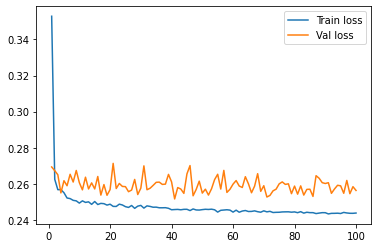

In [16]:
plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, val_loss, label='Val loss')
plt.legend()

## Resultados en el test set

In [17]:
test = pd.read_csv("./data/ford_test.tsv", sep="\t", header=None)

In [18]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-1,-0.140402,0.171641,0.302044,0.232804,0.033853,-0.224183,-0.469987,-0.645396,-0.617700,...,-0.319966,0.390903,0.974831,1.258717,1.143316,0.647092,-0.049582,-0.690402,-0.976596,-0.794263
1,-1,0.334038,0.322253,0.453844,0.671852,0.887897,1.020469,1.059750,1.030290,0.950746,...,0.435186,-0.346502,-0.924912,-1.208716,-1.247996,-1.139974,-1.041772,-1.041772,-1.159614,-1.375659
2,-1,0.716686,0.744367,0.725913,0.661325,0.555217,0.413585,0.246580,0.065273,-0.121109,...,3.171020,2.276019,1.219548,0.081881,-1.050250,-2.092881,-2.983269,-3.675281,-4.136622,-4.339612
3,1,1.240282,1.331189,1.386596,1.383220,1.305979,1.142784,0.878613,0.532291,0.140025,...,-0.820262,-1.124551,-1.302012,-1.340564,-1.271440,-1.146352,-1.011328,-0.931222,-0.934498,-1.001288
4,-1,-1.159478,-1.204174,-1.167605,-1.033518,-0.818166,-0.558119,-0.299291,-0.093691,0.022770,...,0.660853,0.441438,0.206176,-0.006941,-0.146919,-0.183082,-0.112382,0.008987,0.131413,0.186266


In [19]:
X_test = test.iloc[:,1:].values
y_test = test.iloc[:,0].values

In [20]:
y_test = (y_test+1)/2

In [21]:
model.evaluate(X_test, y_test)

42/42 [==============================] - 0s 2ms/step - loss: 0.2571


0.2571341097354889

In [22]:
y_pred_proba = model.predict(X_test)

42/42 [==============================] - 0s 2ms/step


In [23]:
y_pred = [0 if p < 0.5 else 1 for p in y_pred_proba] # list comprehension

In [24]:
y_test

array([0., 0., 0., ..., 1., 1., 1.])

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.51      0.56      0.53       681
         1.0       0.48      0.44      0.46       639

    accuracy                           0.50      1320
   macro avg       0.50      0.50      0.49      1320
weighted avg       0.50      0.50      0.50      1320



In [27]:
confusion_matrix(y_test, y_pred)

array([[378, 303],
       [360, 279]], dtype=int64)